In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Attribute Information:**

L'ensemble de données se compose de 10 attributs numériques et de 8 attributs catégoriels.
L'attribut 'Revenu' peut être utilisé comme étiquette de classe.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" et "Product Related Duration" représentent le nombre de différents types de pages visitées par le visiteur au cours de cette session et le temps total passé dans chacune des ces catégories de pages. Les valeurs de ces fonctionnalités sont dérivées des informations d'URL des pages visitées par l'utilisateur et mises à jour en temps réel lorsqu'un utilisateur effectue une action, par ex. passer d'une page à l'autre. Les fonctionnalités "Taux de rebond", "Taux de sortie" et "Valeur de la page" représentent les métriques mesurées par "Google Analytics" pour chaque page du site e-commerce. La valeur de la fonctionnalité "Taux de rebond" pour une page Web fait référence au pourcentage de visiteurs qui entrent sur le site à partir de cette page, puis le quittent ("rebond") sans déclencher d'autres demandes au serveur d'analyse au cours de cette session. La valeur de la fonctionnalité "Taux de sortie" pour une page Web spécifique est calculée comme pour toutes les pages vues sur la page, le pourcentage qui était le dernier de la session. La fonctionnalité « Valeur de la page » représente la valeur moyenne d'une page Web qu'un utilisateur a visitée avant d'effectuer une transaction de commerce électronique. La fonctionnalité "Jour spécial" indique la proximité de l'heure de visite du site avec un jour spécial spécifique (par exemple, la fête des mères, la Saint-Valentin) au cours duquel les sessions sont plus susceptibles d'être finalisées avec une transaction. La valeur de cet attribut est déterminée en tenant compte de la dynamique du commerce électronique telle que la durée entre la date de commande et la date de livraison. Par exemple, pour le jour de Valentina, cette valeur prend une valeur non nulle entre le 2 février et le 12 février, zéro avant et après cette date sauf si elle est proche d'un autre jour spécial, et sa valeur maximale de 1 le 8 février. système, navigateur, région, type de trafic, type de visiteur en tant que visiteur récurrent ou nouveau, une valeur booléenne indiquant si la date de la visite est le week-end et le mois de l'année.



In [3]:
# Lire la base de donnée

data = pd.read_csv('online_shoppers_intention.csv')

# taille de la base de donnée
data.shape

(12330, 18)

In [4]:
# Apercu de la base de donnée

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# description de la base de donnée 

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Regarder les types de la variable

data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# extraire les informations des données

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
# Vérifier si les données contiennent des valeurs NULL

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# vérifier la répartition des revenus

data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


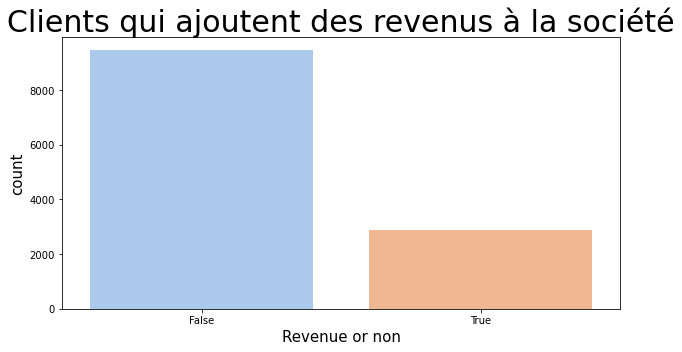

In [10]:
# vérification de la répartition des clients sur les revenus

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Clients qui ajoutent des revenus à la société', fontsize = 30)
plt.xlabel('Revenue où non', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [11]:

#  vérification de la distribution de Week-end

data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


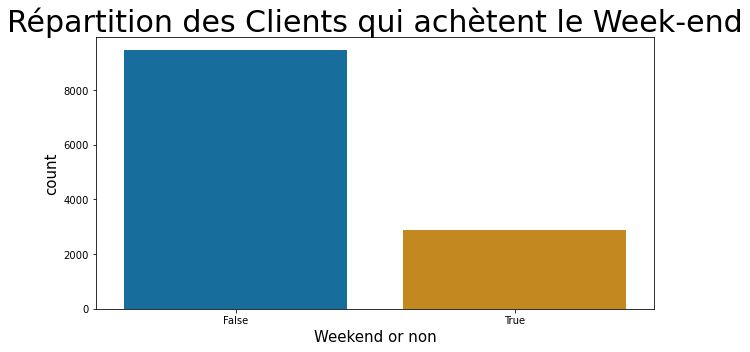

In [11]:
# vérification de la répartition des clients le week-end

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Weekend'], palette = 'colorblind')
plt.title('Répartition des Clients qui achètent le Week-end', fontsize = 30)
plt.xlabel('Weekend où non', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [13]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

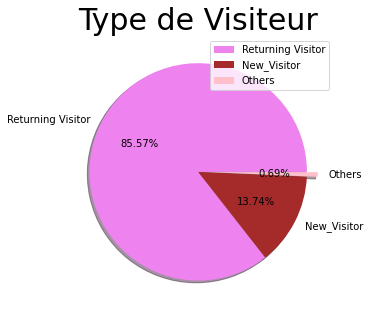

In [15]:
# plotting a pie chart for browsers

size = [10551, 1694, 85]
colors = ['violet', 'Brown', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Type de Visiteur', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

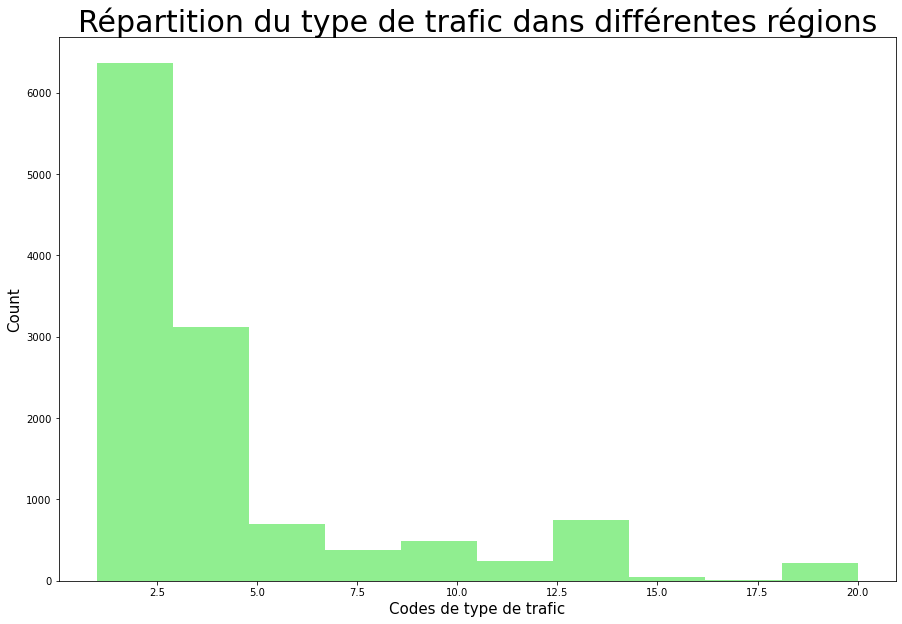

In [17]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['TrafficType'], color = 'lightgreen')
plt.title('Répartition du type de trafic dans différentes régions',fontsize = 30)
plt.xlabel('Codes de type de trafic', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

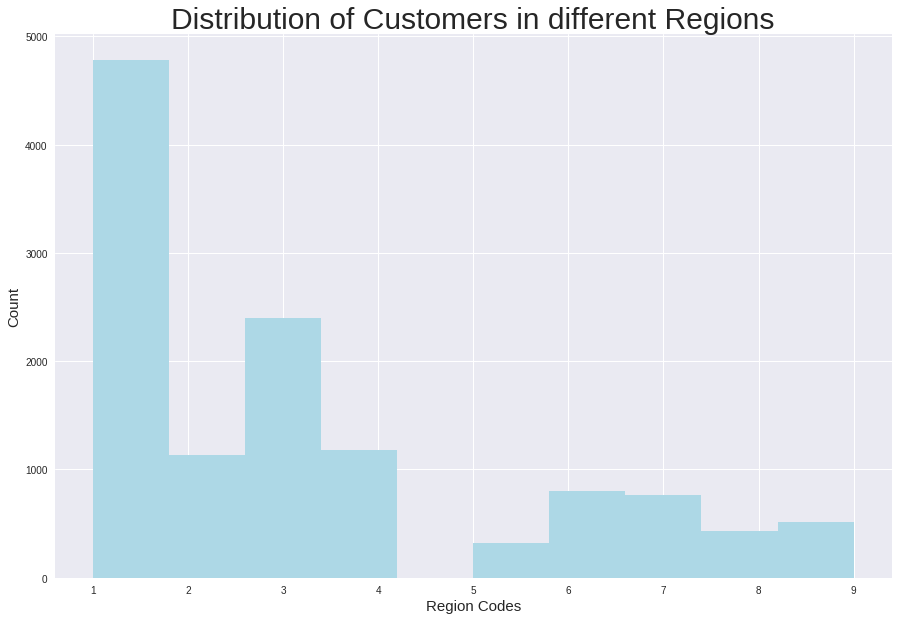

In [16]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [18]:
# vérifier différents no. des navigateurs qu'ils utilisent pour faire leurs achats

data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

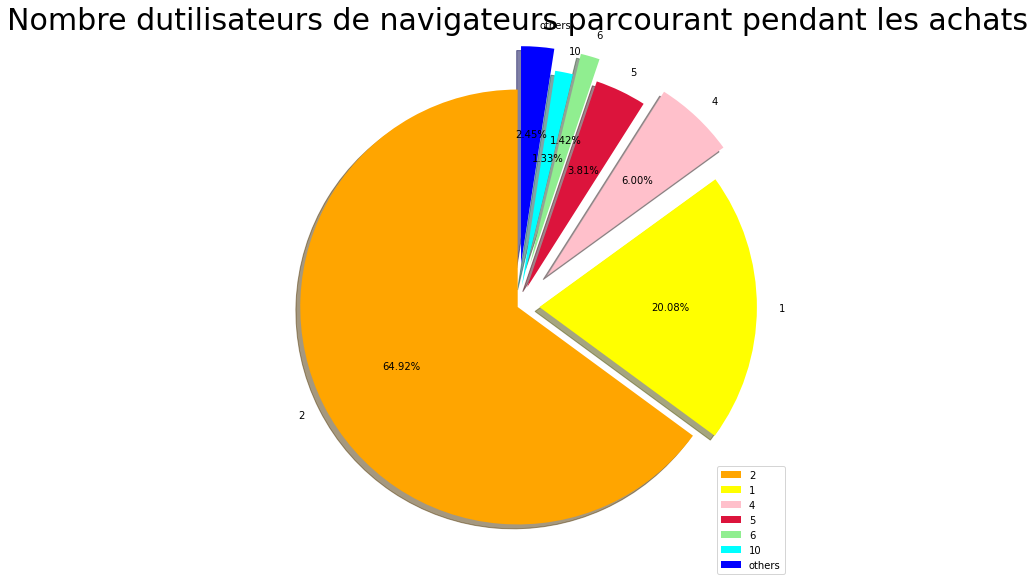

In [19]:
# tracer un graphique à secteurs pour les navigateurs

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Nombre dutilisateurs de navigateurs parcourant pendant les achats', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
# vérifier le non. des systèmes d'exploitation que chaque utilisateur possède

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

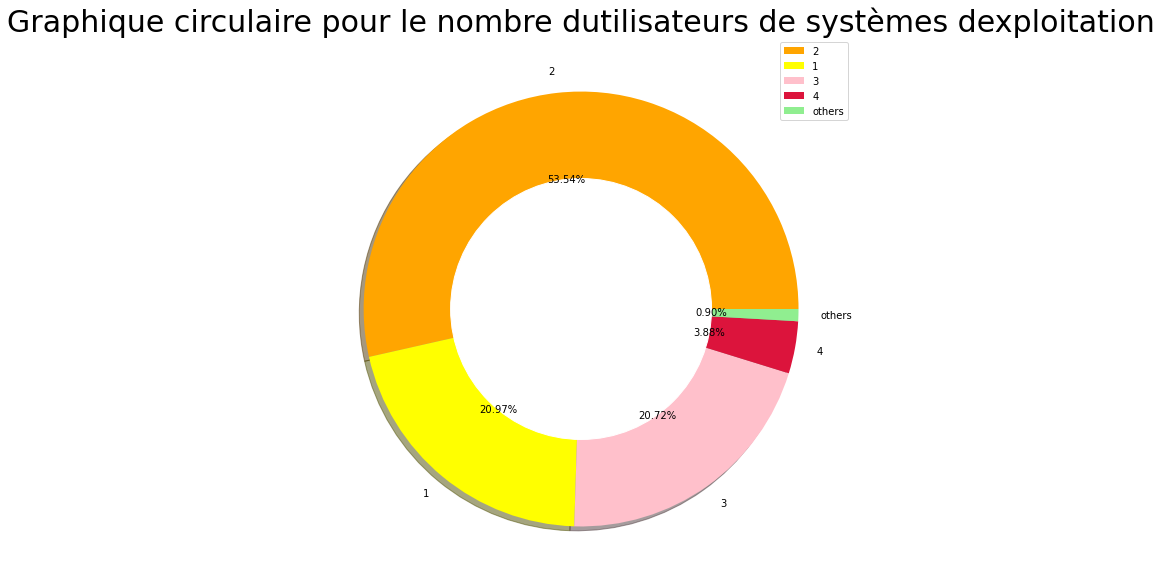

In [21]:
# créer un graphique en anneau pour les variations des mois

# tracer un graphique à secteurs pour un nombre différent d'utilisateurs de systèmes d'exploitation .

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Graphique circulaire pour le nombre dutilisateurs de systèmes dexploitation', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [21]:
# vérifier les mois avec le plus grand nombre de clients visitant les sites d'achat en ligne

data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

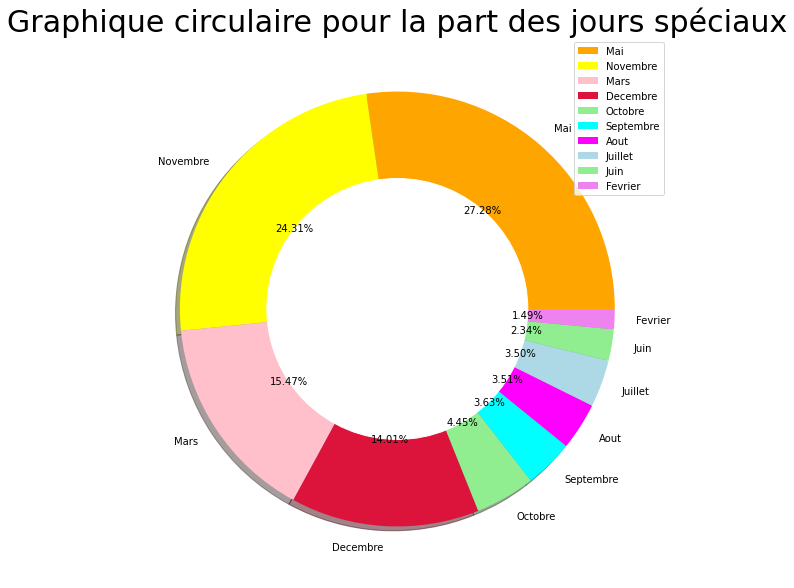

In [23]:
# création d'un graphique en anneau pour les variations des mois'

# tracer un graphique à secteurs pour la part des jours spéciaux 

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "Mai", "Novembre", "Mars", "Decembre", "Octobre", "Septembre", "Aout", "Juillet", "Juin", "Fevrier"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Graphique circulaire pour la part des jours spéciaux', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [24]:
# en regardant les probabilités de jour spécial

data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

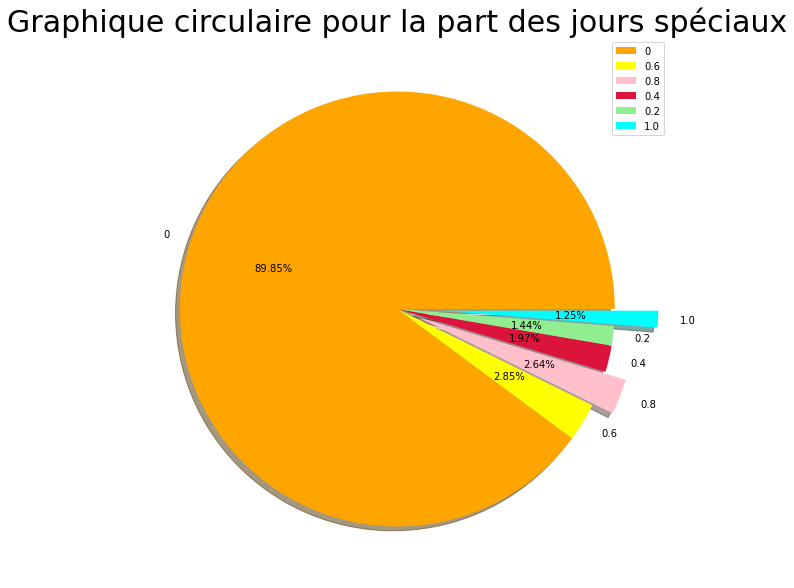

In [25]:
# tracer un graphique à secteurs pour la part des jours spéciaux 

size = [11079, 351, 325, 243, 178, 154]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan']
labels = "0", "0.6", "0.8", "0.4", "0.2", "1.0"
explode = [0, 0, 0.1, 0, 0, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Graphique circulaire pour la part des jours spéciaux', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


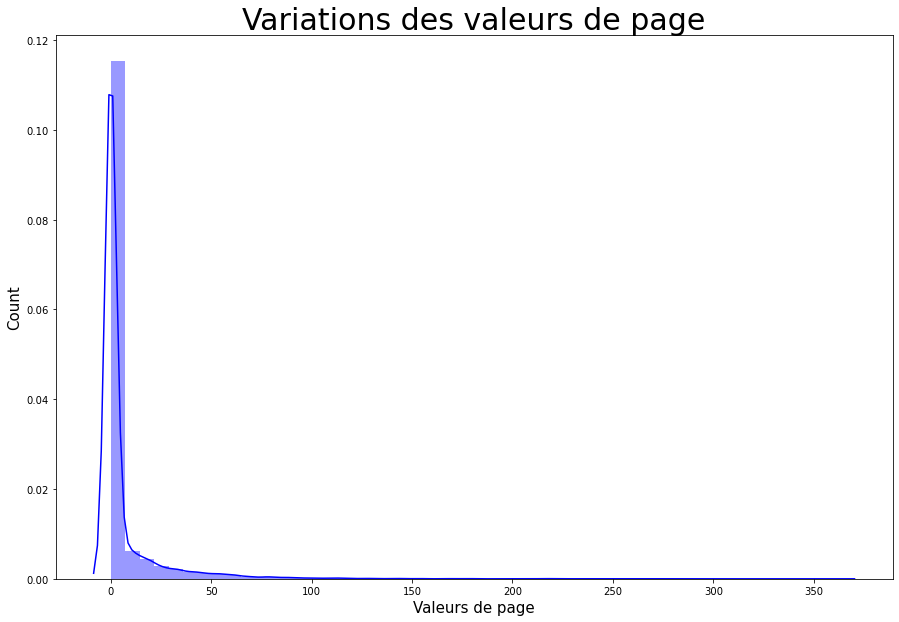

In [26]:
# vérifier les variations de la durée administrative pour les acheteurs en ligne

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['PageValues'], color = 'blue')
plt.title('Variations des valeurs de page', fontsize = 30)
plt.xlabel('Valeurs de page', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


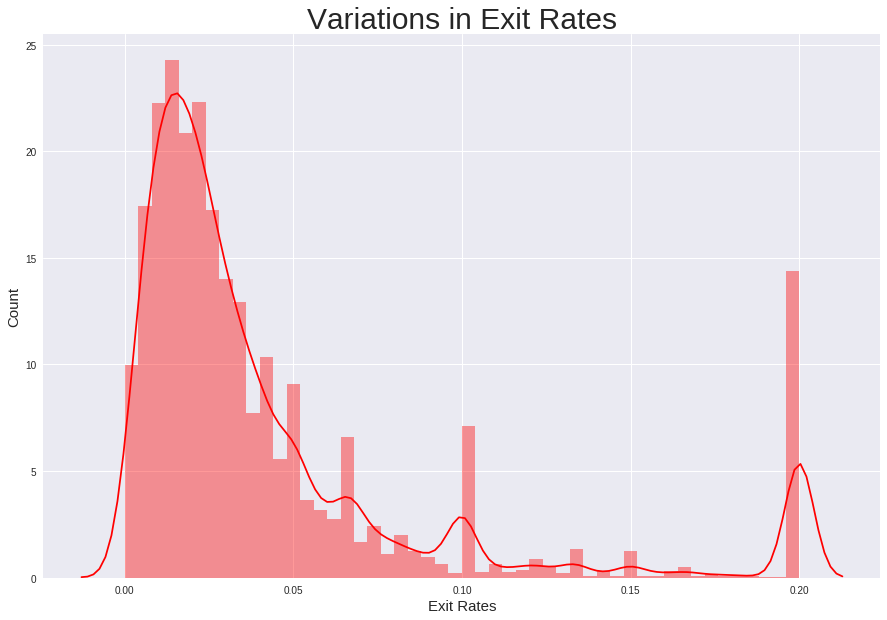

In [26]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ExitRates'], color = 'red')
plt.title('Variations des taux de sortie', fontsize = 30)
plt.xlabel('Taux de sortie', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


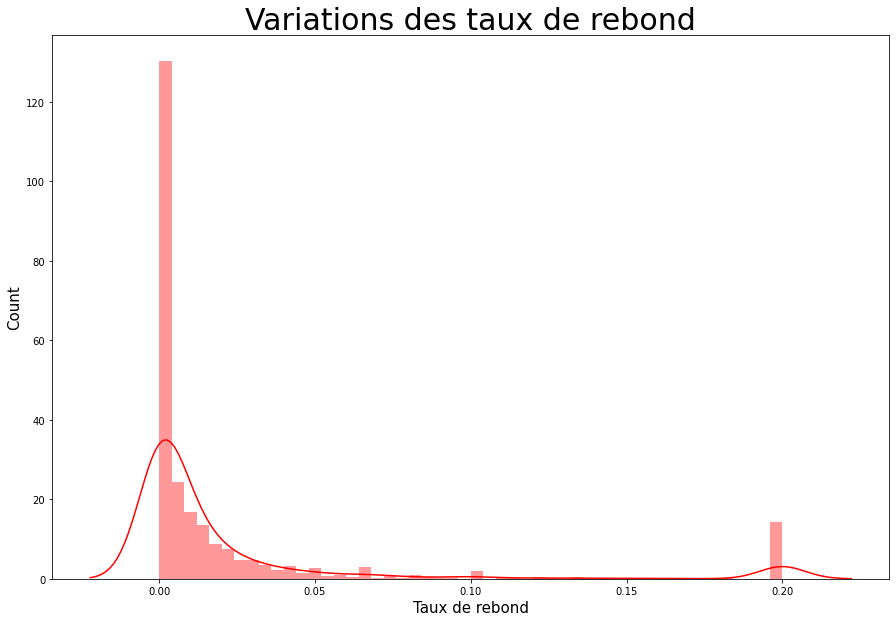

In [27]:
# vérifier les variations de la durée administrative pour les acheteurs en ligne

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['BounceRates'], color = 'red')
plt.title('Variations des taux de rebond', fontsize = 30)
plt.xlabel('Taux de rebond', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


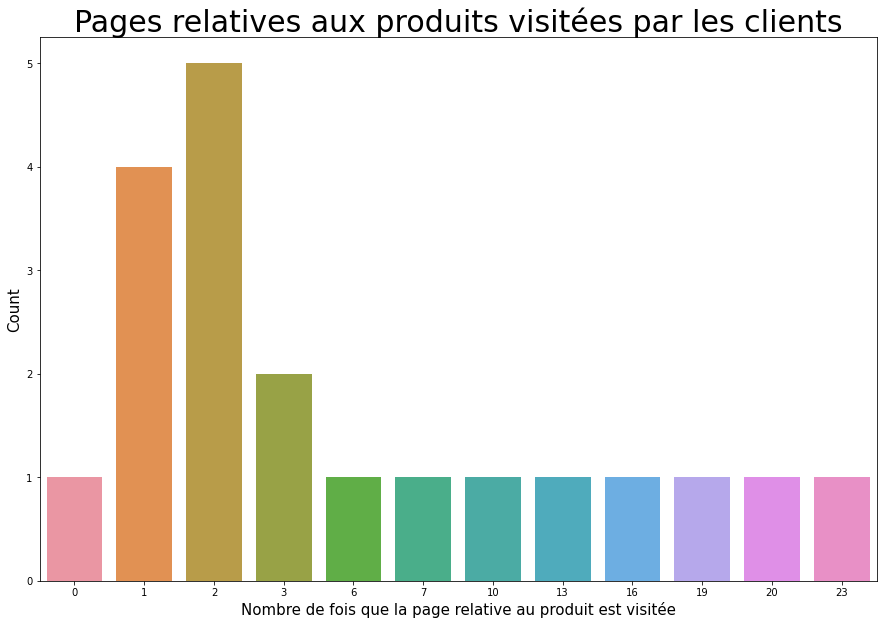

In [28]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['ProductRelated'].head(20))
plt.title('Pages relatives aux produits visitées par les clients', fontsize = 30)
plt.xlabel('Nombre de fois que la page relative au produit est visitée', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


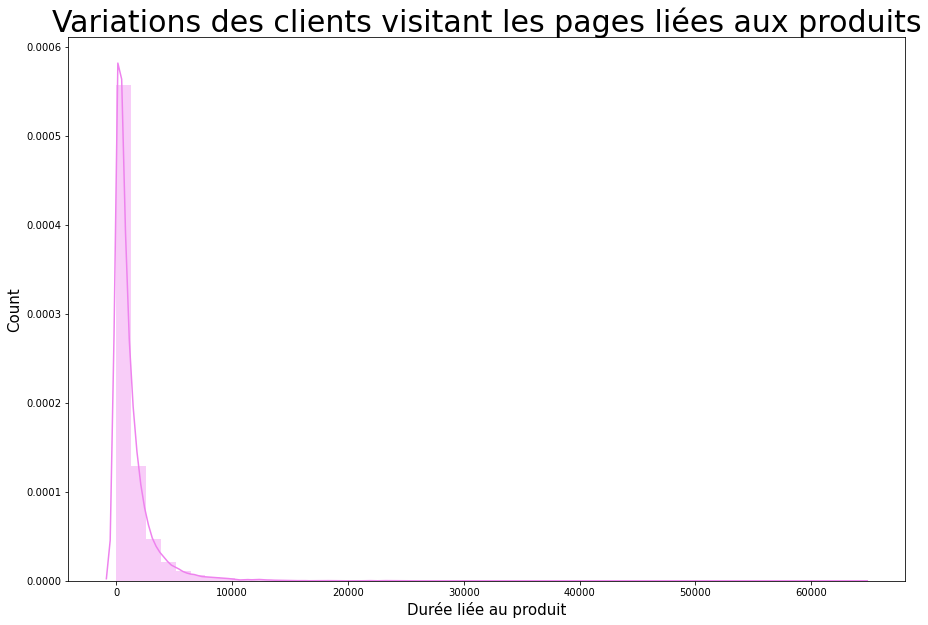

In [29]:
# vérifier les variations de la durée administrative pour les acheteurs en ligne

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ProductRelated_Duration'], color = 'violet')
plt.title('Variations des clients visitant les pages liées aux produits', fontsize = 30)
plt.xlabel('Durée liée au produit', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


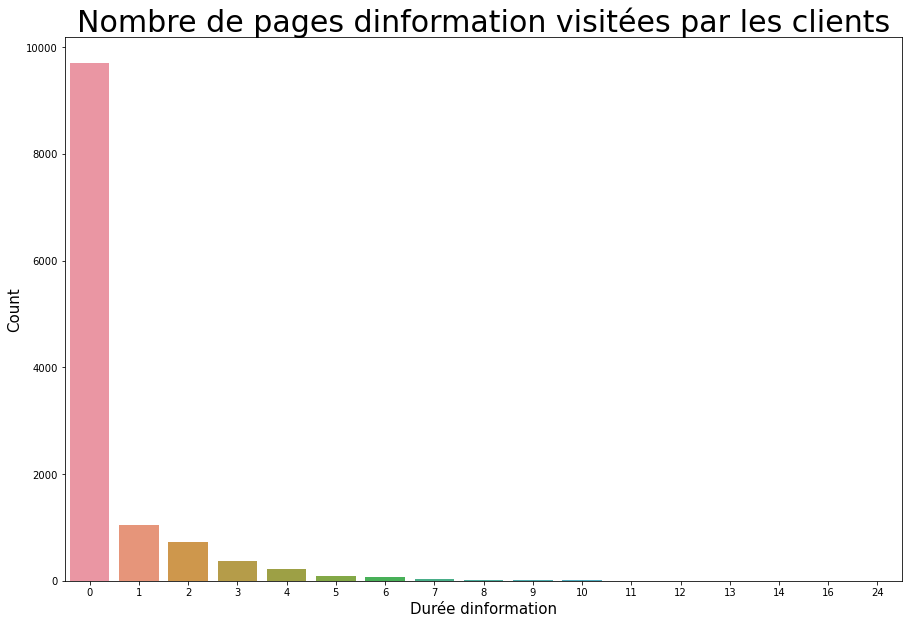

In [30]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data['Informational'])
plt.title('Nombre de pages dinformation visitées par les clients', fontsize = 30)
plt.xlabel('Durée dinformation', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


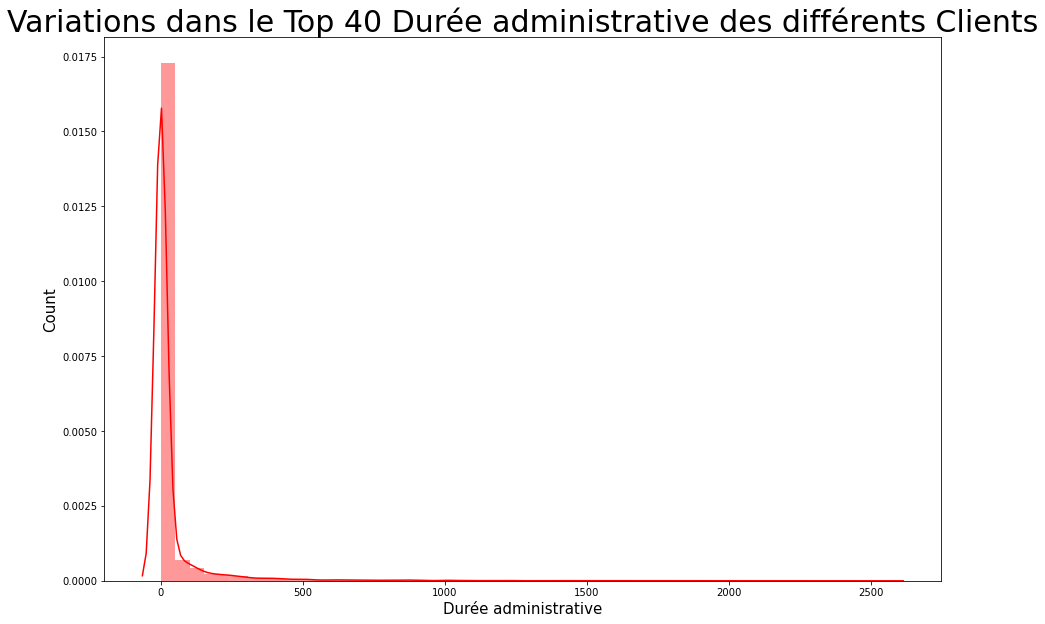

In [32]:
# vérifier les variations de la durée administrative pour les acheteurs en ligne
plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Informational_Duration'], color = 'red')
plt.title('Variations dans le Top 40 Durée administrative des différents Clients', fontsize = 30)
plt.xlabel('Durée administrative', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

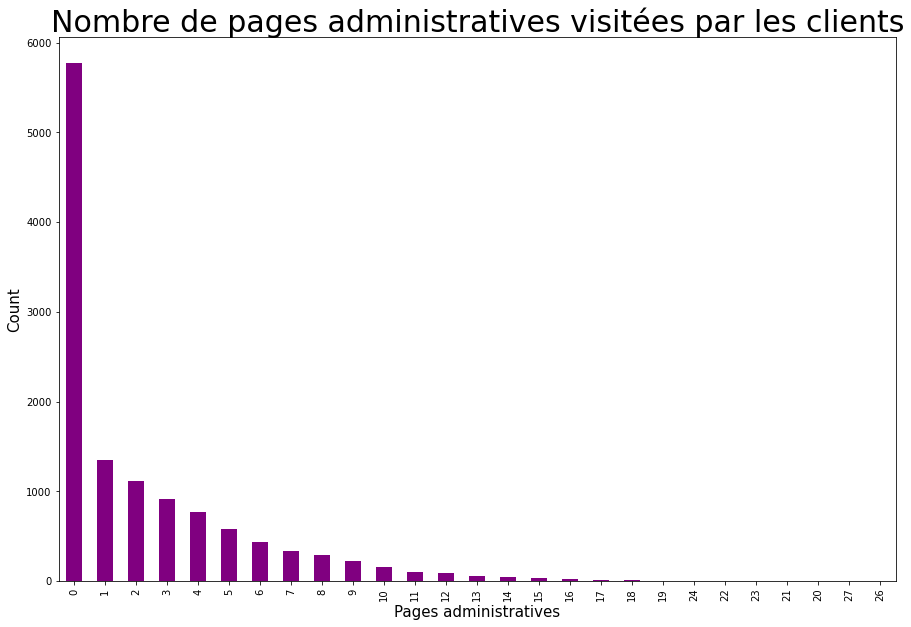

In [33]:
# vérifier les variations de la durée administrative pour les acheteurs en ligne

plt.rcParams['figure.figsize'] = (15, 10)
data['Administrative'].value_counts().plot.bar(color = 'purple')
plt.title('Nombre de pages administratives visitées par les clients', fontsize = 30)
plt.xlabel('Pages administratives', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


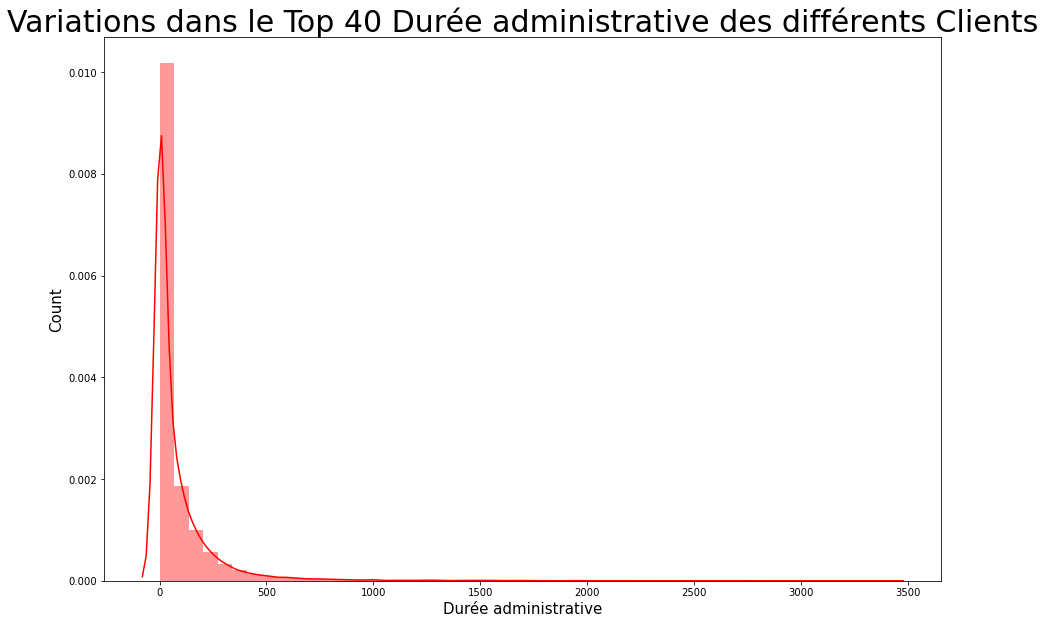

In [35]:
# vérifier les variations de la durée administrative pour les acheteurs en ligne

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Administrative_Duration'], color = 'red')
plt.title('Variations dans le Top 40 Durée administrative des différents Clients', fontsize = 30)
plt.xlabel('Durée administrative', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Bi-Variate Analysis**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


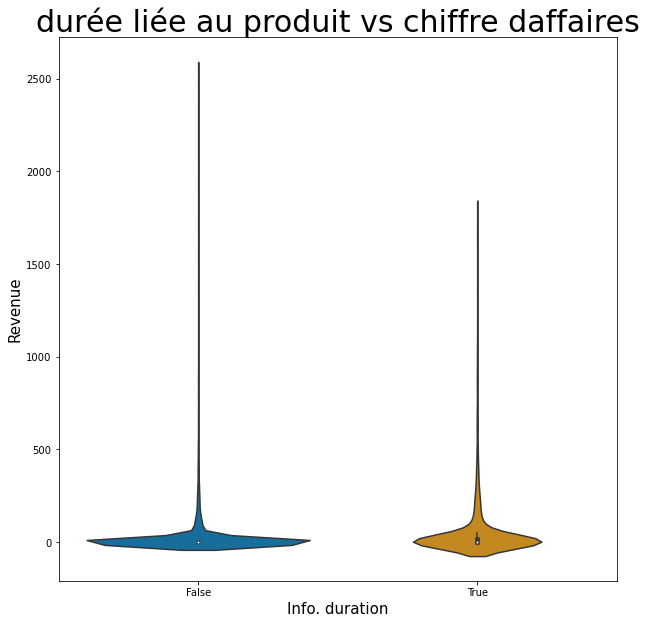

In [38]:
# durée liée au produit vs chiffre d'affaires
plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['Informational_Duration'], palette = 'colorblind')
plt.title('durée liée au produit vs chiffre daffaires', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


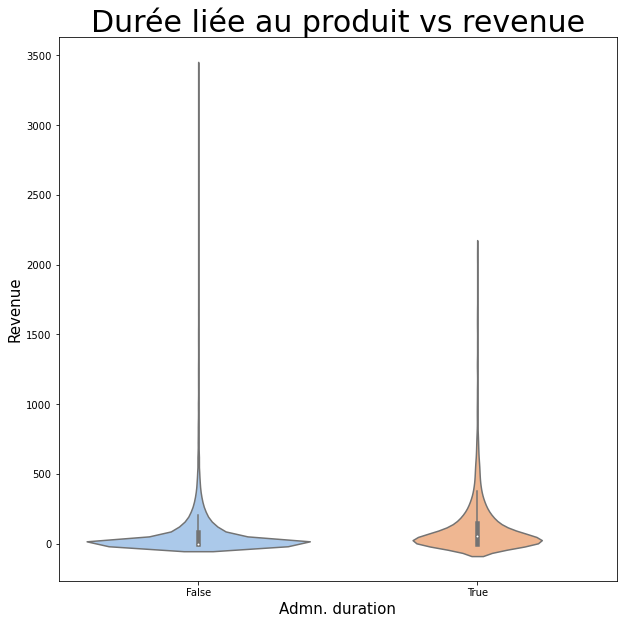

In [37]:

# Durée liée au produit vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Durée liée au produit vs revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


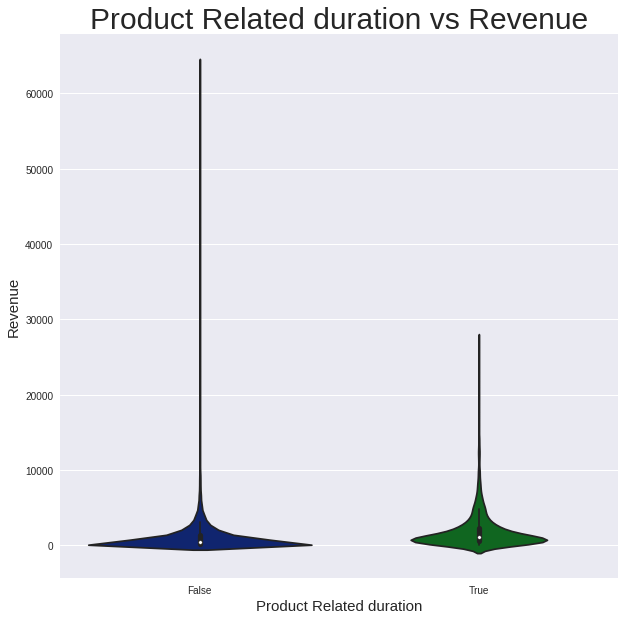

In [36]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(data['Revenue'], data['ProductRelated_Durat ion'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


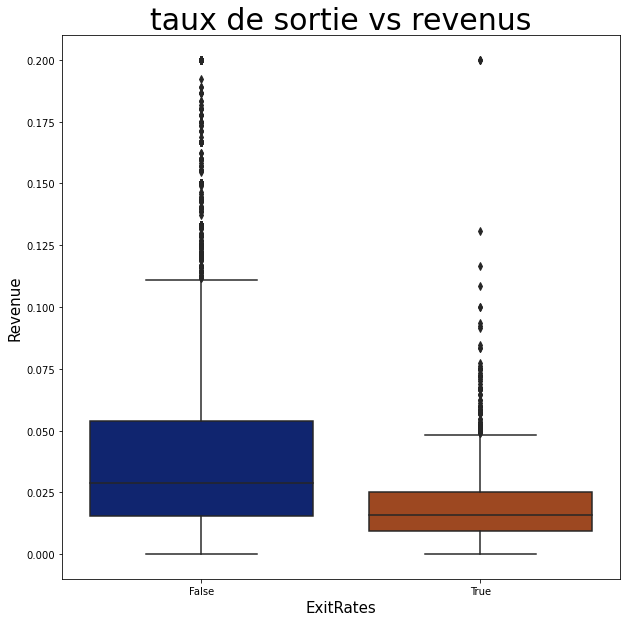

In [39]:
# taux de sortie vs revenus

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['ExitRates'], palette = 'dark')
plt.title('taux de sortie vs revenus', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


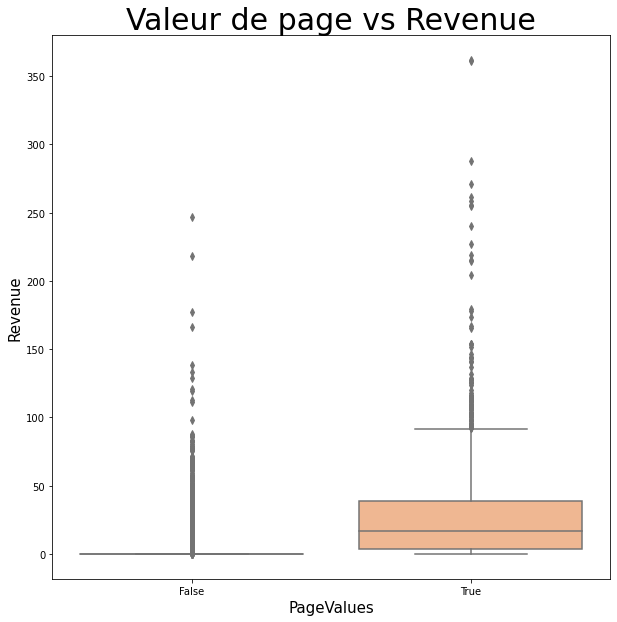

In [40]:
# valeur de page vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['PageValues'], palette = 'pastel')
plt.title('Valeur de page vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


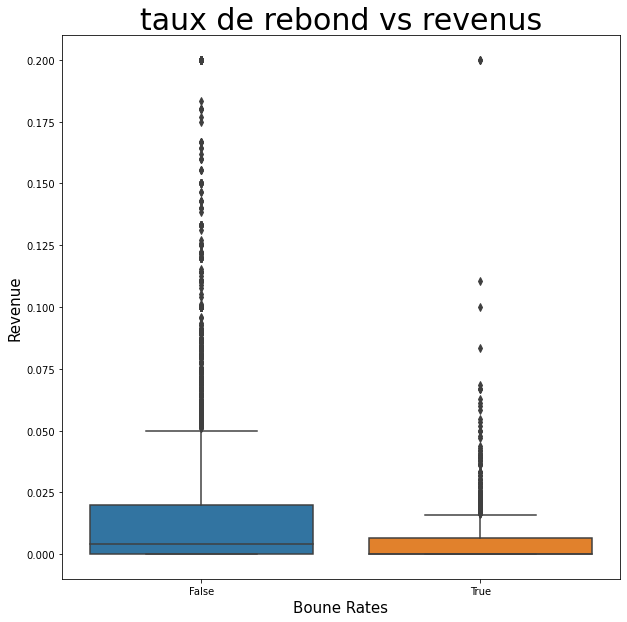

In [41]:

# taux de rebond vs revenus

plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(data['Revenue'], data['BounceRates'])
plt.title('taux de rebond vs revenus', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

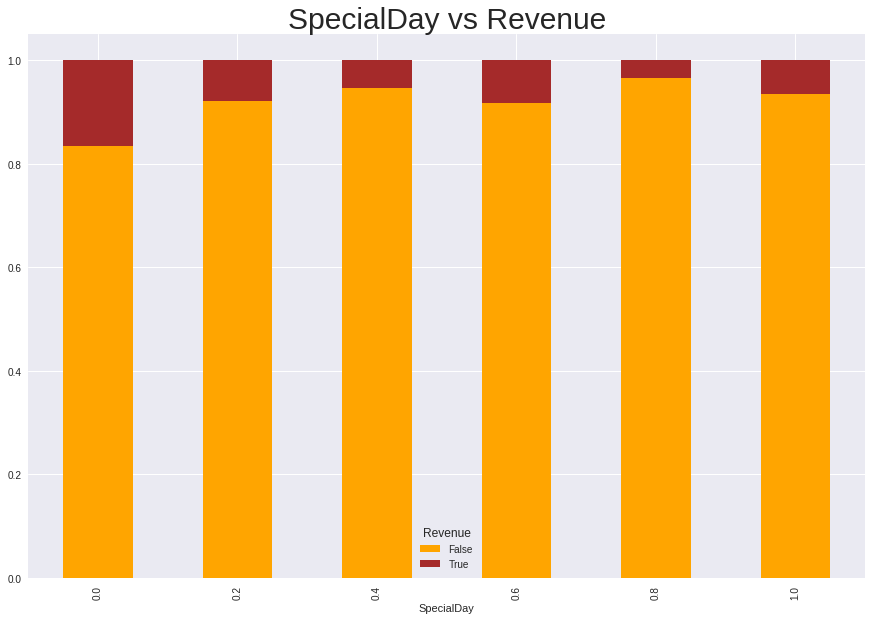

In [40]:
# jour spécial vs revenus
df = pd.crosstab(data['SpecialDay'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['orange', 'brown'])
plt.title('SpecialDay vs Revenue', fontsize = 30)
plt.show()

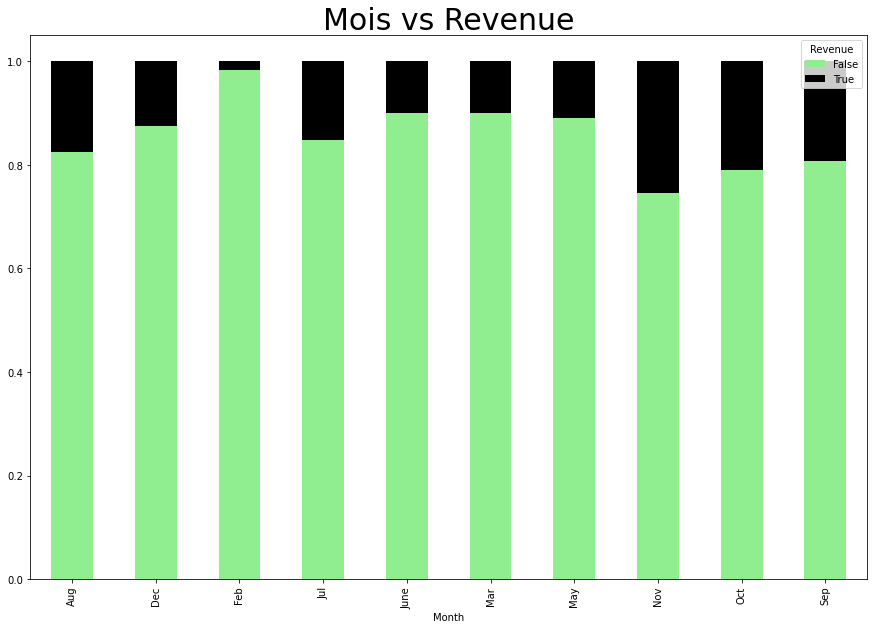

In [42]:
# mois vs revenue

df = pd.crosstab(data['Month'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightgreen', 'black'])
plt.title('Mois vs Revenue', fontsize = 30)
plt.show()

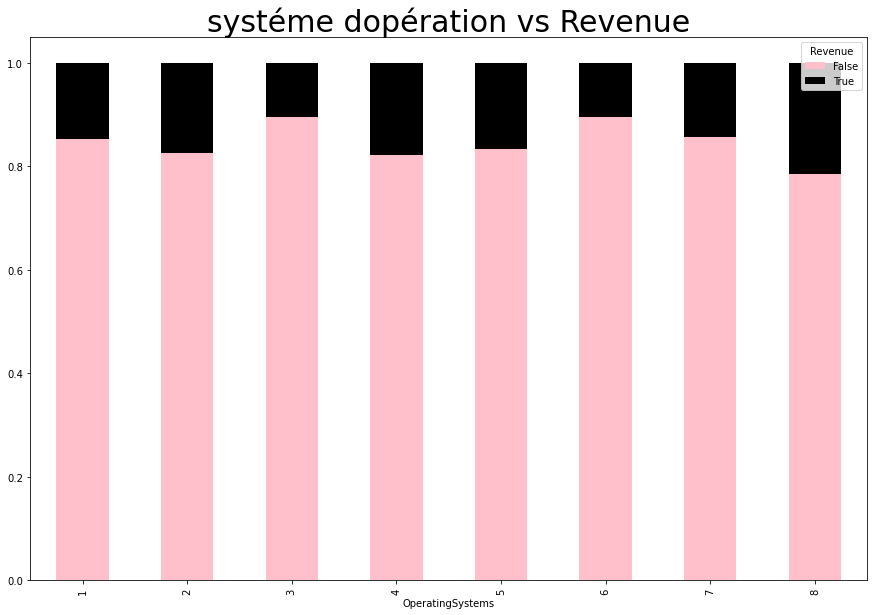

In [43]:
# systéme d'opération vs Revenue

df = pd.crosstab(data['OperatingSystems'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['pink', 'black'])
plt.title('systéme dopération vs Revenue', fontsize = 30)
plt.show()

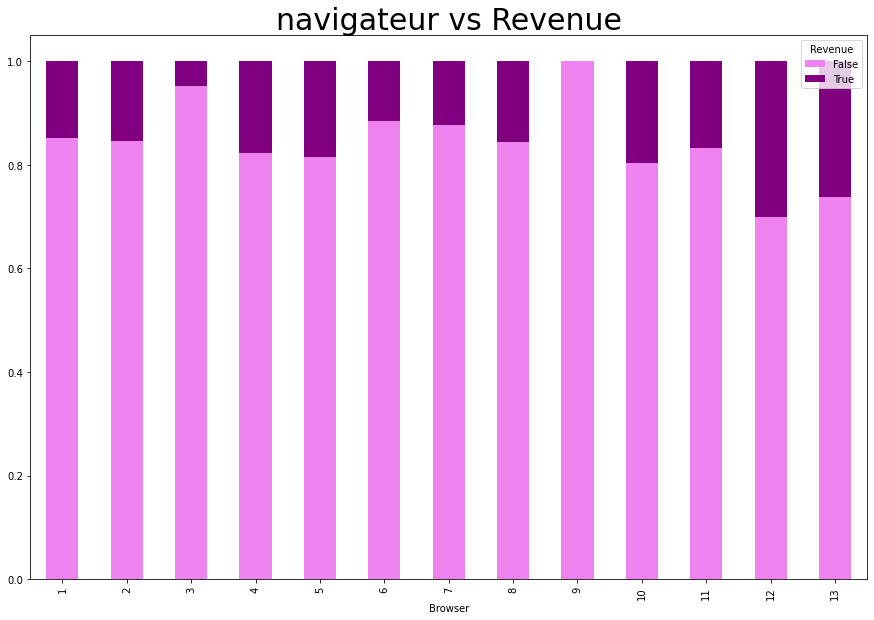

In [44]:
# navigateur vs Revenue

df = pd.crosstab(data['Browser'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['violet', 'Purple'])
plt.title('navigateur vs Revenue', fontsize = 30)
plt.show()

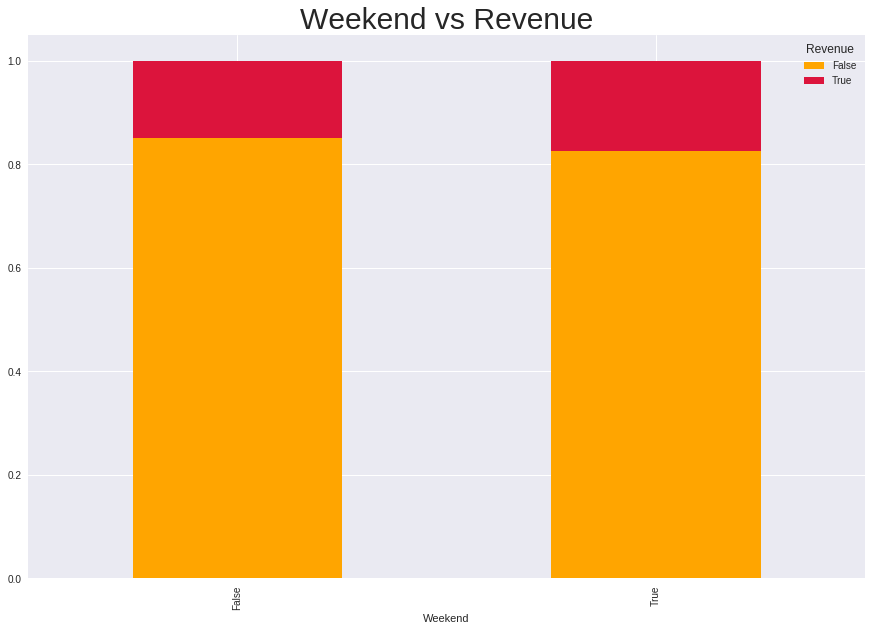

In [44]:
# weekend vs Revenue

df = pd.crosstab(data['Weekend'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

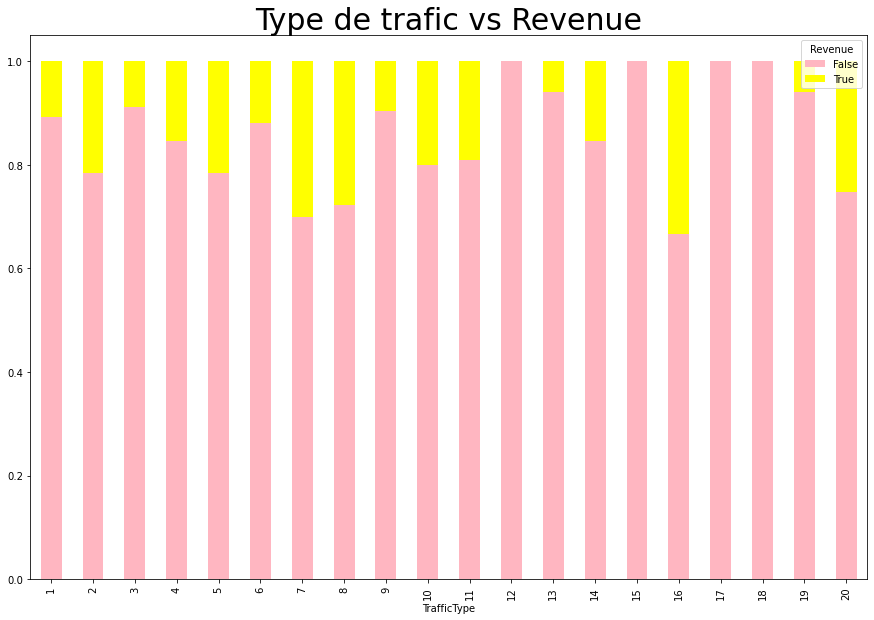

In [45]:
# Traffic Type vs Revenue

df = pd.crosstab(data['TrafficType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightpink', 'yellow'])
plt.title('Type de trafic vs Revenue', fontsize = 30)
plt.show()

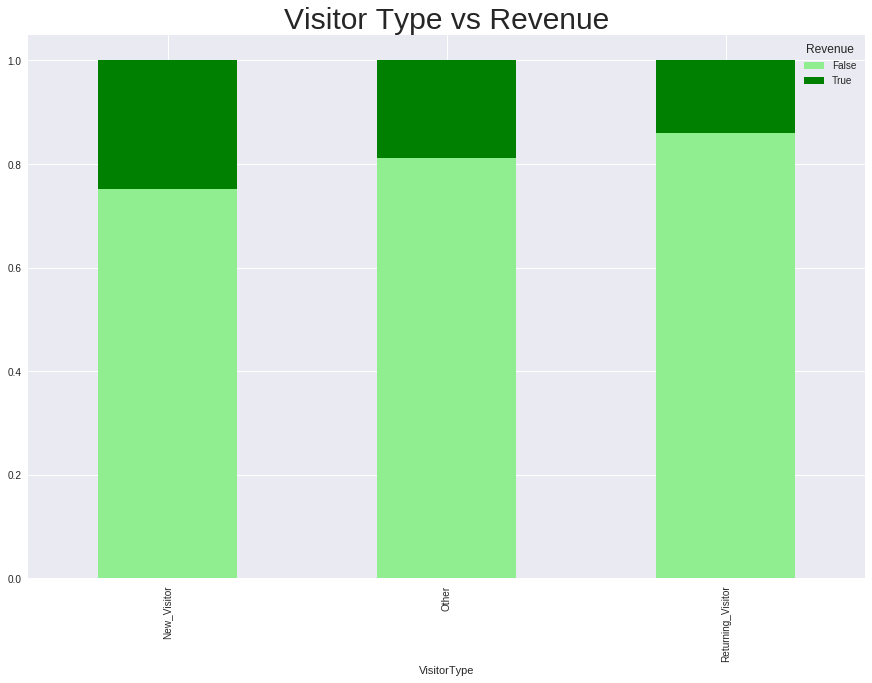

In [46]:
# type de visiteur vs revenue

df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightgreen', 'green'])
plt.title('Type de visiteur vs Revenue', fontsize = 30)
plt.show()


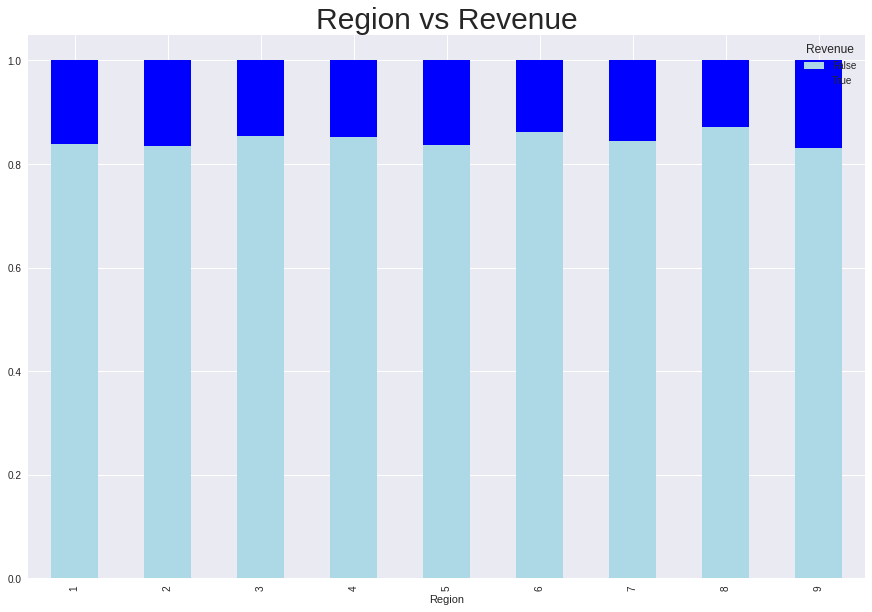

In [47]:
# region vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

Text(0.5, 1.0, 'LM Plot between Admistrative and Information')

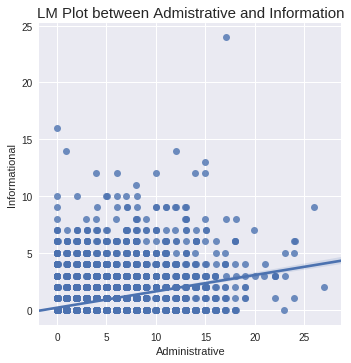

In [48]:
# lm plot

plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', data = data, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)


**MultiVariable Analyse**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


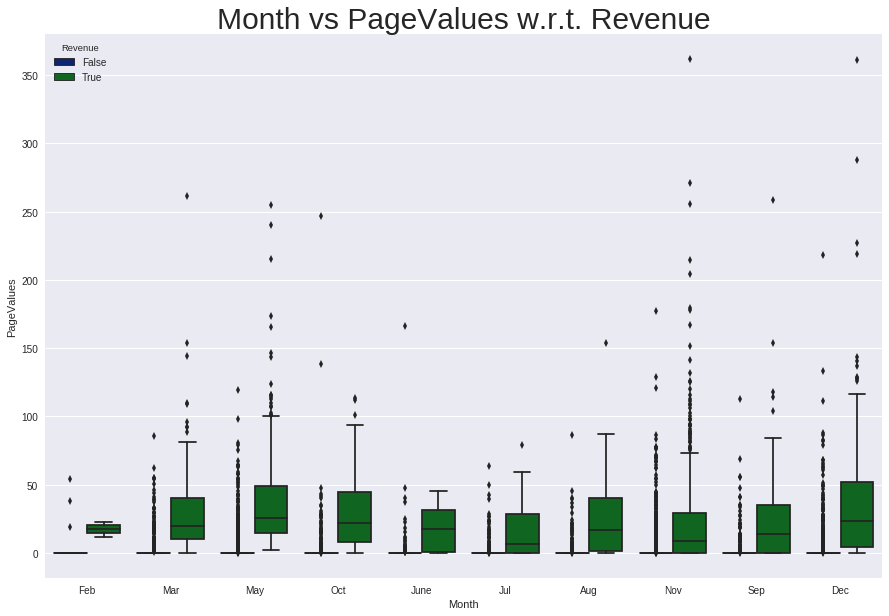

In [49]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'dark')
plt.title('Mois vs Valeurs de page w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


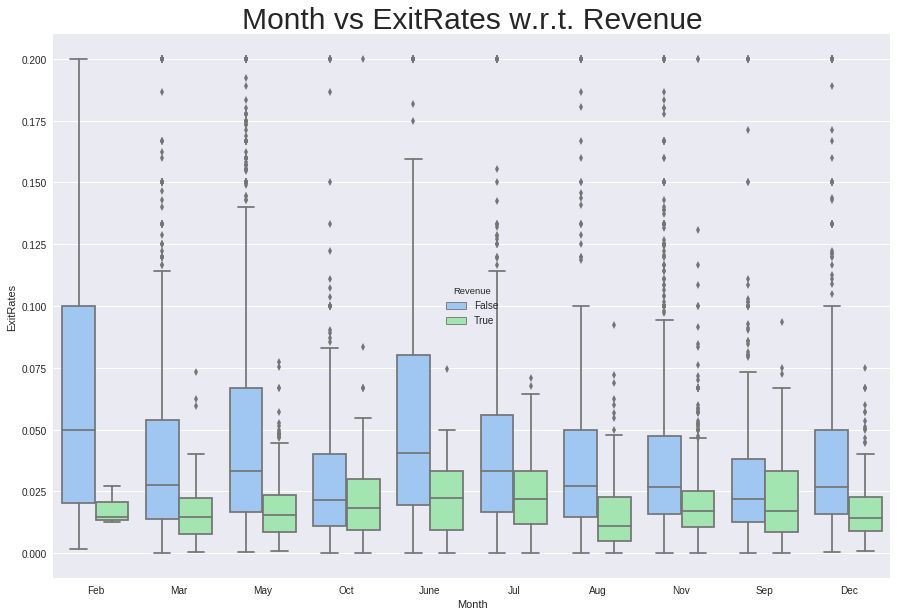

In [50]:
# month vs exitrates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Month vs ExitRates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


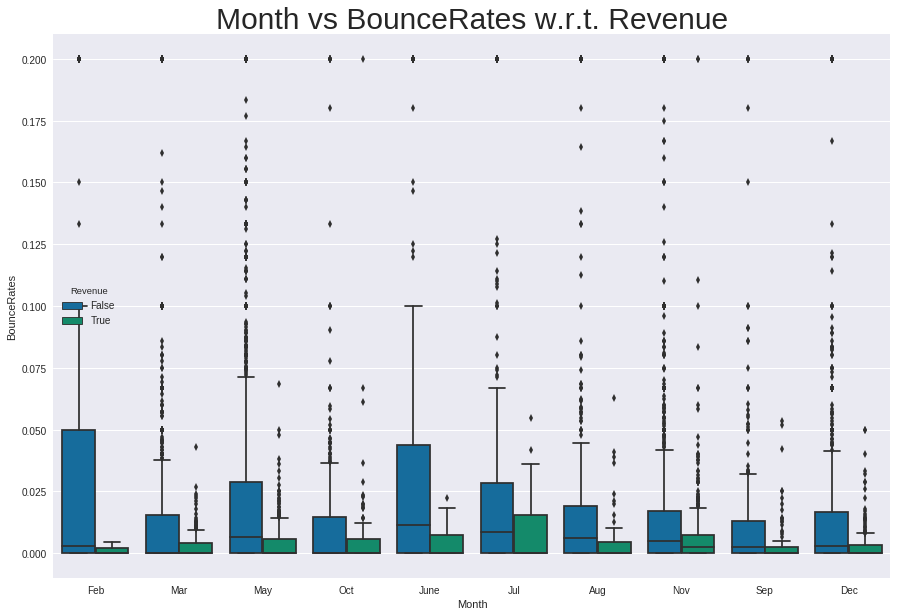

In [51]:
# month vs bouncerates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Month vs BounceRates w.r.t. Revenue', fontsize = 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


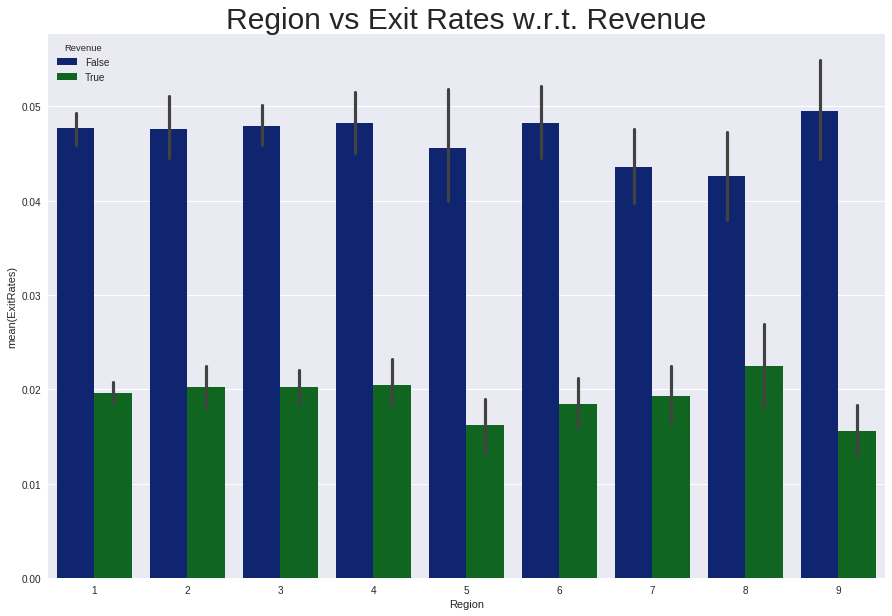

In [56]:
# region vs exit rates w.r.t. revenue


plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'dark')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)
plt.show()

In [58]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [46]:
# encodage

data1 = pd.get_dummies(data)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [47]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [48]:
# obtenir des variables dépendantes et indépendantes

x = data1
y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (12330, 29)
Shape of y: (12330,)


In [53]:
# diviser les données

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 29)
Shape of y_train : (8631,)
Shape of x_test : (3699, 29)
Shape of y_test : (3699,)


In [52]:
# mise à l'échelle standard

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


[[-0.39792564 -0.4120854   4.29945169 ... -0.40126917 -0.08296309
   0.41268037]
 [-0.7000453  -0.45115096 -0.38992079 ... -0.40126917 -0.08296309
   0.41268037]
 [-0.7000453  -0.45115096 -0.38992079 ... -0.40126917 -0.08296309
   0.41268037]
 ...
 [ 3.22751021  1.36907579  3.51788961 ... -0.40126917 -0.08296309
   0.41268037]
 [-0.7000453  -0.45115096 -0.38992079 ... -0.40126917 -0.08296309
   0.41268037]
 [ 0.20631367 -0.20167965 -0.38992079 ... -0.40126917 -0.08296309
   0.41268037]]


In [55]:
# extraction de caractéristiques
# Analyse en composantes principales (ACP).

from sklearn.decomposition import PCA

pca = PCA(n_components = None)


x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[[ 2.42732911e+03  7.90917869e+01  9.53343058e+02 ... -3.61819879e-03
   1.87837047e-12  2.37445213e-12]
 [-1.02704603e+03 -4.62010068e+01  5.94588792e+00 ... -8.05442167e-04
  -2.22096726e-12  1.22924933e-12]
 [-5.45883690e+02 -6.60599101e+01 -2.88889569e+00 ... -7.89124225e-03
   2.23753542e-12 -1.29577418e-13]
 ...
 [ 7.04295520e+03 -2.34881170e+01 -9.82995596e+01 ...  1.08205979e-02
  -6.10040450e-14  4.20139456e-14]
 [-8.45465799e+02 -5.37115092e+01  2.59682211e+00 ... -1.26427922e-02
  -1.21138552e-13  7.61132381e-14]
 [ 5.54526495e+02 -6.69060295e+01 -3.38732133e+01 ...  4.96740821e-03
  -1.46640241e-15  4.86224943e-14]]


In [56]:
# MODELLING

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluation du model
print("Précision de la formation :", model.score(x_train, y_train))
print("Précision des tests :", model.score(x_test, y_test))

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

# rapport de classement
cr = classification_report(y_test, y_pred)
print(cr)

Précision de la formation : 0.899895724713243
Précision des tests : 0.884022708840227
[[3037   40]
 [ 389  233]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      3077
           1       0.85      0.37      0.52       622

    accuracy                           0.88      3699
   macro avg       0.87      0.68      0.73      3699
weighted avg       0.88      0.88      0.86      3699



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluation du model
print("Precisions de base :", model.score(x_train, y_train))
print("Precision du test :", model.score(x_test, y_test))

#  matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

# rapport de classement 
cr = classification_report(y_test, y_pred)
print(cr)

Precisions de base : 1.0
Precision du test : 0.998918626655853
[[3076    1]
 [   3  619]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      1.00      1.00       622

    accuracy                           1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



In [67]:
# MODELLING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluation du model
print("precision de base :", model.score(x_train, y_train))
print("precision du test :", model.score(x_test, y_test))

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

#  rapport de classement
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9991889699918897
[[3075    2]
 [   1  621]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      1.00      1.00       622

   micro avg       1.00      1.00      1.00      3699
   macro avg       1.00      1.00      1.00      3699
weighted avg       1.00      1.00      1.00      3699



In [68]:
# MODELLING

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluation the model
print("Precision de base  :", model.score(x_train, y_train))
print("Precision du test:", model.score(x_test, y_test))

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

#  rapport de classememt
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9945931332792647
[[3069    8]
 [  12  610]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       0.99      0.98      0.98       622

   micro avg       0.99      0.99      0.99      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       0.99      0.99      0.99      3699



In [69]:
# MODELLING

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluation du modele
print("précsion de base :", model.score(x_train, y_train))
print("précisions du test:", model.score(x_test, y_test))

# matrice de  confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

# rapport de classement
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9978372533117059
[[3077    0]
 [   8  614]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3077
           1       1.00      0.99      0.99       622

   micro avg       1.00      1.00      1.00      3699
   macro avg       1.00      0.99      1.00      3699
weighted avg       1.00      1.00      1.00      3699



In [59]:
# validation croisée

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("precision de la mooyenne :", cvs.mean())
print("Écart-type moyen :", cvs.std())

precision de la mooyenne : 0.9994206257242177
Écart-type moyen : 0.0005793742757821407


In [73]:
#Maintenant que l'on sait que le meilleur modéle est LogisticRegression() il reste plus qu'a le deploier sur le site du client 


Best Accuracy : 1.0
Best Parameters : {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
